# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url)
#print(response_data_btc)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
response_data_eth = requests.get(eth_url)
#print(response_data_btc)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18984406,
            "total_supply": 18984406,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39354.0,
                    "volume_24h": 20852834593,
                    "market_cap": 746129744094,
                    "percentage_change_1h": -0.30521031719279,
                    "percentage_change_24h": -0.793864399086483,
                    "percentage_change_7d": 3.35483121360051,
                    "percent_change_1h": -0.30521031719279,
                    "percent_change_24h": -0.793864399086483,
                    "percent_change_7d": 3.35483121360051
                },
                "CAD": {
                    "price": 50255.058,
                    "volume_24h": 26629069775.261,
                    "

In [11]:
# Compute current value of my crpto
current_btc = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = current_btc * my_btc                                             
current_eth = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = current_eth * my_eth    
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47224.80
The current value of your 5.3 ETH is $13873.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)



In [15]:
# Format current date as ISO format
current_date = pd.Timestamp("2022-03-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
    limit=1000,
).df



# Preview DataFrame
ticker_data.head()

C:\Users\John\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:16: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  app.launch_new_instance()


AGG                                        SPY  \
                             open    high     low    close    volume    open   
time                                                                           
2022-03-15 00:00:00-04:00  107.84  107.92  107.43  107.585  12548269  419.77   

                                                             
                             high     low   close    volume  
time                                                         
2022-03-15 00:00:00-04:00  426.84  418.42  426.17  91514235

In [17]:
# Pick AGG and SPY close prices
agg_close_price = float(ticker_data["AGG"]["close"])
spy_close_price = float(ticker_data["SPY"]["close"])
                                     

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.585
Current SPY closing price: $426.17


In [18]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21308.50
The current value of your 200 AGG shares is $21517.00


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
data = {'amount':[crypto, shares]} 

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,61097.921
shares,42825.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

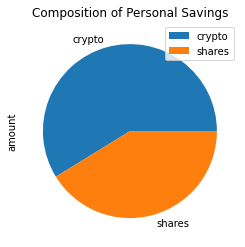

In [22]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [25]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares + crypto
dollars_away = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations!! You have enough money in your savings to cover your emergency fund.")
elif total_savings == emergency_fund:
    print(f"Congratulations!! You have met your financial goal.")
else:
    print(f"You are ${dollars_away:0.2f} from reaching your financial goal.")
    

Congratulations!! You have enough money in your savings to cover your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-15', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

C:\Users\John\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:8: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2018-03-27 00:00:00-04:00  106.63  106.95  106.61  106.870  2608360  266.17   
2018-03-28 00:00:00-04:00  107.05  107.10  106.88  106.940  3810747  260.75   
2018-03-29 00:00:00-04:00  106.95  107.26  106.95  107.235  5600597  261.10   
2018-04-02 00:00:00-04:00  106.90  107.04  106.82  106.910  6661775  262.56   
2018-04-03 00:00:00-04:00  106.82  106.87  106.74  106.760  5871914  258.87   

                                                              
                             high     low   close     volume  
time                                                          
2018-03-27 00:00:00-04:00  266.77  258.84  260.53  102512350  
2018-03-28 00:00:00-04:00  262.64  258.58  259.84  105882176  
2018-03-29 00:00:00-04:00  265.26  260.28  263.49   82896154  
2018-04-02 00:00:00-04:00  263.13  254.67  257.53  126727740  
2018-04-03 00:00:00-04:00  261.31  256.84  260.77   88849064

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [31]:
# Printing the simulation input data
MC.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2018-03-27 00:00:00-04:00  106.63  106.95  106.61  106.870  2608360   
2018-03-28 00:00:00-04:00  107.05  107.10  106.88  106.940  3810747   
2018-03-29 00:00:00-04:00  106.95  107.26  106.95  107.235  5600597   
2018-04-02 00:00:00-04:00  106.90  107.04  106.82  106.910  6661775   
2018-04-03 00:00:00-04:00  106.82  106.87  106.74  106.760  5871914   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-27 00:00:00-04:00          NaN  266.17  266.77  258.84  260.53   
2018-03-28 00:00:00-04:00     0.000655  260.75  262.64  258.58  259.84   
2018-03-29 00:00:00-04:00     0.002759  261.10  265.26  260.28  263.49   
2018-04-02 00:00:00-04:00    -0.003031  262.56  263.13  254.67  257.53   
2018-04-03 00:00:00-04:00    -0.001403  258.87  261.31  256.84  260.77   

                                                   
                              volume daily_return  
time                                               
2018-03-27 00:00:00-04:00  102512350          NaN  
2018-03-28 00:00:00-04:00  105882176    -0.002648  
2018-03-29 00:00:00-04:00   82896154     0.014047  
2018-04-02 00:00:00-04:00  126727740    -0.022619  
2018-04-03 00:00:00-04:00   88849064     0.012581

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\John\Unit5_FinancialPlanning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006701,0.996633,1.014194,0.999188,0.990803,1.012008,0.985902,1.005747,0.996490,0.993670,...,0.995358,0.988303,0.992268,1.002170,0.999461,0.990506,0.994329,1.000966,0.998169,1.009489
2,1.003610,0.992282,1.012612,0.993885,0.988971,1.009095,0.988971,1.000252,0.999305,0.987104,...,1.001141,0.989819,1.002888,1.008265,0.991574,1.006860,1.002332,0.994772,0.998448,1.017536
3,0.998677,0.985765,1.004490,0.996701,0.994621,1.018002,1.001468,1.003240,0.993837,0.986110,...,1.013437,0.975261,1.013955,1.020689,1.000755,1.009083,1.005762,0.993332,0.994925,1.034900
4,1.010779,0.985390,0.986767,0.989962,0.991196,1.009937,0.992296,1.010352,1.005358,0.975438,...,1.016260,0.975506,1.016674,1.035962,0.998779,1.008483,1.014632,1.000626,1.003458,1.041038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.829546,30.250550,13.542484,12.753145,6.499257,16.118455,7.651988,11.024700,4.232814,15.170212,...,21.891794,18.010021,19.354789,5.655486,9.412338,21.504288,4.429626,29.342965,10.466150,19.774698
7557,4.827840,30.358809,13.481366,12.733872,6.447825,15.832145,7.641428,11.157876,4.255935,15.349821,...,21.645687,17.852515,19.330081,5.643099,9.408676,21.630121,4.450984,29.365719,10.421251,19.919005
7558,4.836071,30.566623,13.680977,12.834122,6.513224,15.713034,7.587627,10.995231,4.249075,15.266855,...,21.359724,17.638912,19.221812,5.574723,9.419959,21.709167,4.475360,29.146152,10.381336,19.799741
7559,4.789173,30.762859,13.517223,12.763309,6.466781,15.772482,7.573557,11.037839,4.292631,15.300402,...,21.523272,17.516407,19.177547,5.547501,9.376913,21.611513,4.484035,29.069504,10.408575,19.846717


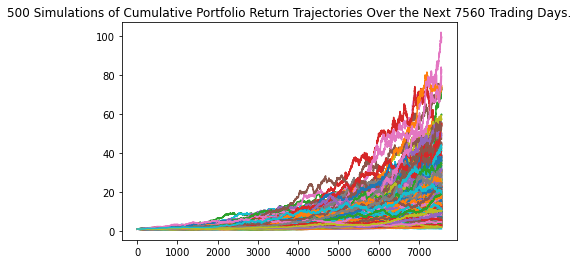

In [33]:
# Plot simulation outcomes
line_plot = MC.plot_simulation()

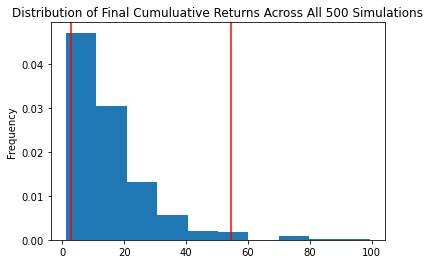

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             15.756550
std              13.231629
min               1.142795
25%               6.892800
50%              11.682533
75%              20.073616
max              99.468749
95% CI Lower      2.672901
95% CI Upper     54.477747
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [65]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53458.01 and $1089554.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [70]:
# Set initial investment
initial_investment_multiplier = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_multiplier = round(tbl[8]*20000*1.5,2)
ci_upper_multiplier = round(tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_multiplier} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_multiplier} and ${ci_upper_multiplier}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $80187.02 and $1634332.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_five.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2018-03-27 00:00:00-04:00  106.63  106.95  106.61  106.870  2608360   
2018-03-28 00:00:00-04:00  107.05  107.10  106.88  106.940  3810747   
2018-03-29 00:00:00-04:00  106.95  107.26  106.95  107.235  5600597   
2018-04-02 00:00:00-04:00  106.90  107.04  106.82  106.910  6661775   
2018-04-03 00:00:00-04:00  106.82  106.87  106.74  106.760  5871914   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-27 00:00:00-04:00          NaN  266.17  266.77  258.84  260.53   
2018-03-28 00:00:00-04:00     0.000655  260.75  262.64  258.58  259.84   
2018-03-29 00:00:00-04:00     0.002759  261.10  265.26  260.28  263.49   
2018-04-02 00:00:00-04:00    -0.003031  262.56  263.13  254.67  257.53   
2018-04-03 00:00:00-04:00    -0.001403  258.87  261.31  256.84  260.77   

                                                   
                              volume daily_return  
time                                               
2018-03-27 00:00:00-04:00  102512350          NaN  
2018-03-28 00:00:00-04:00  105882176    -0.002648  
2018-03-29 00:00:00-04:00   82896154     0.014047  
2018-04-02 00:00:00-04:00  126727740    -0.022619  
2018-04-03 00:00:00-04:00   88849064     0.012581

In [40]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\John\Unit5_FinancialPlanning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000887,1.006330,1.023372,0.990029,0.997383,1.010150,1.005725,1.002306,1.005443,1.013064,...,1.003475,0.999717,1.001288,0.989251,0.981285,1.010070,1.012716,1.003537,1.010998,1.002870
2,0.995378,0.992958,1.037082,0.986122,0.986966,1.013140,1.019559,1.010777,1.015257,1.016264,...,0.999852,0.995623,0.987603,0.992316,0.989570,1.014795,1.007306,1.014147,0.999941,1.002839
3,1.005939,0.987610,1.044204,0.971399,0.971719,1.024823,1.018806,1.006690,1.021027,1.023763,...,1.006329,1.007771,0.988294,0.997827,0.999274,1.023799,0.998555,1.017150,0.985669,0.998989
4,1.006788,0.992497,1.047691,0.957826,0.971740,1.013091,1.023574,1.008154,1.026722,1.031526,...,1.024026,1.010016,0.987888,1.001143,0.993430,1.035612,1.006662,1.024212,0.986157,0.989916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.207987,1.709483,2.146140,0.879916,1.642634,1.144129,3.792795,2.261345,1.656963,1.253928,...,1.760416,1.301443,1.468836,2.389456,2.657283,1.231702,1.399046,1.319900,0.844660,1.360978
1257,2.196421,1.708803,2.173615,0.878836,1.655041,1.148636,3.774312,2.263854,1.695806,1.243753,...,1.746096,1.304600,1.481070,2.361079,2.680002,1.230624,1.393610,1.316784,0.844584,1.363352
1258,2.200081,1.715350,2.130547,0.873585,1.659198,1.150956,3.806227,2.250018,1.697184,1.254472,...,1.761084,1.310321,1.490000,2.344023,2.645590,1.246908,1.397101,1.315805,0.855651,1.371395
1259,2.196668,1.728048,2.143858,0.876564,1.663854,1.149478,3.805298,2.241961,1.648714,1.276689,...,1.756962,1.307796,1.472090,2.346036,2.691133,1.247039,1.390641,1.329766,0.843347,1.368175


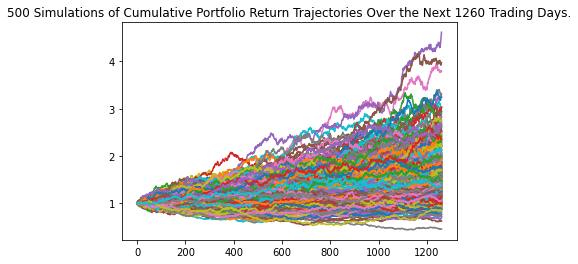

In [41]:
# Plot simulation outcomes
line_plot_five = MC_five.plot_simulation()

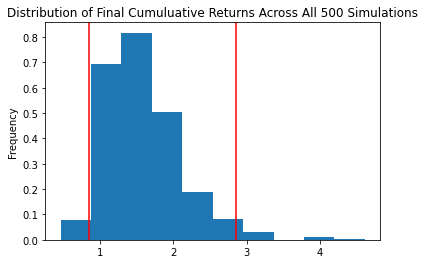

In [42]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_five.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.579601
std               0.527529
min               0.456159
25%               1.211472
50%               1.490871
75%               1.836098
max               4.615823
95% CI Lower      0.844442
95% CI Upper      2.859975
Name: 1260, dtype: float64


In [56]:
# Set initial investment
initial_investment_five = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*50000,2)
ci_upper_five = round(tbl_five[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $42222.1 and $142998.77


### Ten Years Retirement Option

In [57]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_ten.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2018-03-27 00:00:00-04:00  106.63  106.95  106.61  106.870  2608360   
2018-03-28 00:00:00-04:00  107.05  107.10  106.88  106.940  3810747   
2018-03-29 00:00:00-04:00  106.95  107.26  106.95  107.235  5600597   
2018-04-02 00:00:00-04:00  106.90  107.04  106.82  106.910  6661775   
2018-04-03 00:00:00-04:00  106.82  106.87  106.74  106.760  5871914   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-03-27 00:00:00-04:00          NaN  266.17  266.77  258.84  260.53   
2018-03-28 00:00:00-04:00     0.000655  260.75  262.64  258.58  259.84   
2018-03-29 00:00:00-04:00     0.002759  261.10  265.26  260.28  263.49   
2018-04-02 00:00:00-04:00    -0.003031  262.56  263.13  254.67  257.53   
2018-04-03 00:00:00-04:00    -0.001403  258.87  261.31  256.84  260.77   

                                                   
                              volume daily_return  
time                                               
2018-03-27 00:00:00-04:00  102512350          NaN  
2018-03-28 00:00:00-04:00  105882176    -0.002648  
2018-03-29 00:00:00-04:00   82896154     0.014047  
2018-04-02 00:00:00-04:00  126727740    -0.022619  
2018-04-03 00:00:00-04:00   88849064     0.012581

In [58]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\John\Unit5_FinancialPlanning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997275,1.003969,1.003689,1.003690,1.011732,1.003851,1.001893,0.996901,0.982810,0.990382,...,1.002924,0.998250,1.004661,1.000624,0.981897,0.994290,1.012418,0.994021,0.989418,0.989981
2,1.000645,1.007472,0.999566,0.997964,1.007106,1.012695,1.008834,0.985462,0.972843,0.997353,...,1.002855,1.000597,0.997903,1.003242,0.987902,1.011655,1.009301,0.989775,0.993401,0.976124
3,0.989559,0.998827,1.000078,0.993390,0.996835,1.025341,1.017388,0.990457,0.985191,0.994467,...,1.020256,1.003091,1.007847,0.996911,1.004906,1.004167,1.010828,0.986253,1.009978,0.983226
4,0.967713,1.003078,1.000589,0.999528,1.015120,1.003753,1.021695,1.009382,0.975958,0.998553,...,1.018786,1.007953,1.004387,0.999738,1.003637,1.007114,1.011477,0.982805,1.014542,0.982515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.132942,3.430388,2.158846,2.612400,1.094070,1.667138,1.246323,2.199980,1.836975,2.835893,...,3.790472,2.688347,2.361708,1.211777,3.627262,3.013739,3.062695,3.493926,1.660801,2.911334
2517,2.101441,3.401960,2.160092,2.600212,1.112943,1.678257,1.236504,2.176458,1.811974,2.798307,...,3.826303,2.761411,2.388060,1.217528,3.618796,3.026658,3.041075,3.460379,1.657516,2.921651
2518,2.089101,3.336567,2.142229,2.626278,1.115779,1.666815,1.228707,2.177586,1.835335,2.759147,...,3.777928,2.778246,2.413774,1.221184,3.631788,2.997502,3.016449,3.441681,1.647344,2.866199
2519,2.086336,3.324655,2.112364,2.622470,1.119115,1.690133,1.210830,2.197033,1.840235,2.757291,...,3.822192,2.820572,2.431584,1.204441,3.661124,3.007384,3.004146,3.437049,1.624610,2.883497


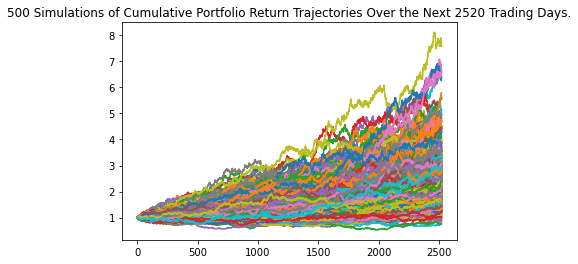

In [59]:
# Plot simulation outcomes
line_plot_ten = MC_ten.plot_simulation()

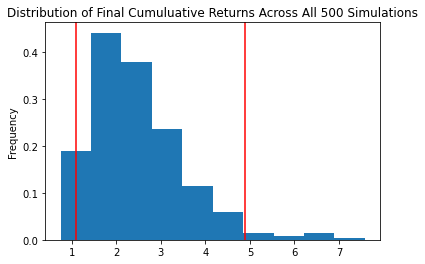

In [60]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_ten.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.487413
std               1.038566
min               0.750352
25%               1.751671
50%               2.326546
75%               3.019791
max               7.580383
95% CI Lower      1.094455
95% CI Upper      4.896228
Name: 2520, dtype: float64


In [62]:
# Set initial investment
initial_investment_ten = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*50000,2)
ci_upper_ten = round(tbl_ten[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $54722.74 and $244811.38


In [71]:
print(f"SUMMARY")

print("*"*50)
print("*"*50)


# Retirement 30 Years 20k investment
print("Retirement 30 Years $20k investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")
print("*"*50)

# Retirement 30 Years 20k investment w/ multiplier
print("Retirement 30 Years $20k investment w/ multiplier --> $30k investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment_multiplier} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_multiplier} and ${ci_upper_multiplier}")
print("*"*50)

# Retirement 5 Years 50k investment
print("Retirement 5 Years $50k investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")
print("*"*50)

# Retirement 10 Years 50k investment
print("Retirement 10 Years $50k investment")
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")
print("*"*50)

SUMMARY
**************************************************
**************************************************
Retirement 30 Years $20k investment
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53458.01 and $1089554.95
**************************************************
Retirement 30 Years $20k investment w/ multiplier --> $30k investment
There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $80187.02 and $1634332.42
**************************************************
Retirement 5 Years $50k investment
There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $42222.1 and $142998.77
**************************************************
Retirement 10 Years $50k investment
There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10